# Plotting Helper

In [6]:
#|default_exp plotting

In [7]:
#|export
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax

In [8]:
#|export
def rgba_from_vals(vs, q=0.0, cmap="viridis", vmin=None, vmax=None):
    if isinstance(q,list):
        v_min = np.quantile(vs, q[0])
        v_max = np.quantile(vs, q[1])
    else:
        v_min = np.quantile(vs, q)
        v_max = np.max(vs)

    if vmax is not None: v_max = vmax
    if vmin is not None: v_min = vmin

    cm  = getattr(plt.cm, cmap)
    vs_ = np.clip(vs, v_min, v_max)
    cs  = cm(plt.Normalize()(vs_))
    return cs

True

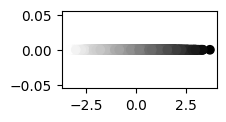

In [9]:
vs = np.random.randn(10000)
cs = rgba_from_vals(vs, q=0.0, cmap="binary")

plt.figure(figsize=(2,1))
plt.scatter(vs, np.zeros(len(vs)), c=cs)
np.quantile(vs, 0.0) == np.min(vs)

In [10]:
#|export
from matplotlib.collections import LineCollection


def line_collection(a, b, c=None, linewidth=1, **kwargs):
    lines = np.column_stack((a, b)).reshape(-1, 2, 2)
    lc = LineCollection(lines, colors=c, linewidths=linewidth, **kwargs)
    return lc

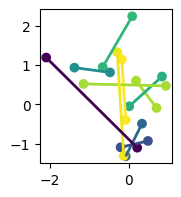

In [11]:
n = 10
a = np.random.randn(n,2)
b = np.random.randn(n,2)
v = np.random.randn(n)
c = rgba_from_vals(v, q=0.0, cmap="viridis")
lc = line_collection(a, b, linewidth=2)
lc.set_colors(c)


# -------------------
plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plt.gca().add_collection(lc)
plt.scatter(*a.T, c=c)
plt.scatter(*b.T, c=c)

In [12]:
#|export
def plot_segs(segs, c="k", linewidth=1, ax=None,  **kwargs):
    if ax is None: ax = plt.gca()
    n = 10
    segs = segs.reshape(-1,2,2)
    a = segs[:,0]
    b = segs[:,1]
    lc = line_collection(a, b, linewidth=linewidth, **kwargs)
    lc.set_colors(c)
    ax.add_collection(lc)

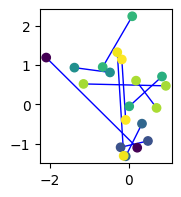

In [13]:
segs = np.stack([a,b],axis=1) 
# -------------------
plt.figure(figsize=(2,2))
plt.gca().set_aspect(1)
plot_segs(segs, c="b", linewidth=1, zorder=-1)
plt.scatter(*a.T, c=c)
plt.scatter(*b.T, c=c)


In [14]:
#|export
def zoom_in(x, pad, ax=None):
    if ax is None: ax = plt.gca()
    ax.set_xlim(np.min(x[...,0])-pad, np.max(x[...,0])+pad)
    ax.set_ylim(np.min(x[...,1])-pad, np.max(x[...,1])+pad)

In [15]:
#|export
from xsight.utils import unit_vec


def plot_poses(ps, sc=None,  r=0.5, clip=-1e12, cs=None, c="lightgray", cmap="viridis", ax=None, q=0.0, zorder=None, linewidth=2):
    if ax is None: ax = plt.gca()
    ax.set_aspect(1)
    ps = ps.reshape(-1,3)

    a = ps[:,:2]
    b = a + r * jax.vmap(unit_vec)(ps[:,2])

    if cs is None:
        if sc is None:
            cs = c
        else:
            sc = sc.reshape(-1)
            sc = jnp.where(jnp==-jnp.inf, clip, sc)
            sc = jnp.clip(sc, clip,  jnp.max(sc))
            sc = jnp.clip(sc, jnp.quantile(sc, q), jnp.max(sc))
            cs = getattr(plt.cm, cmap)(plt.Normalize()(sc))

            order = jnp.argsort(sc)
            a = a[order]
            b = b[order]
            cs = cs[order]



    ax.add_collection(line_collection(a,b, c=cs, zorder=zorder, linewidth=linewidth));

In [22]:
#|export
def plot_pose(p, r=0.5, c="red", ax=None,zorder=None, linewidth=2):
    if ax is None: ax = plt.gca()
    ax.set_aspect(1)
    a = p[:2]
    b = a + r*unit_vec(p[2])
    ax.plot([a[0],b[0]],[a[1],b[1]], c=c, zorder=zorder, linewidth=linewidth)


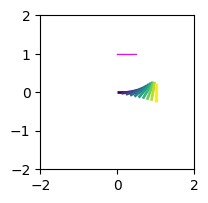

In [21]:
ps = jnp.linspace(0.0, 1., 10)[:,None]*jnp.array([1.,-.25,jnp.pi/2])
sc = ps[:,2]
# -------------------
plt.figure(figsize=(2,2))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect(1)
plot_poses(ps, sc=sc, cmap="viridis", ax=None, q=0.0, linewidth=2)
plot_pose(jnp.array([0,1,0]), r=0.5, c="magenta", ax=None,zorder=None, linewidth=1)